In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [19]:
%cd template/

[Errno 2] No such file or directory: 'template/'
/home/razvan/Masters/1st_year/sem1/ML_course/labs/ex02/template


In [18]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

[Errno 2] No such file or directory: './labs/ex02/templates'
/home/razvan/Masters/1st_year/sem1/ML_course/labs/ex02/template


In [20]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [41]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    N = len(y)
    print(N)
    print(0.5 / N)
    e = y - tx @ w
    return (0.5 / N) * np.sum(e ** 2)

In [43]:
result = compute_loss(y, tx, [1, 2])
print()
print(result)

10000
5e-05

2694.4833658870843


# 2 Grid Search

Fill in the function `grid_search()` below:

In [44]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i][j] = compute_loss(y, tx, [w0[i], w1[j]])
    return losses

Let us play with the grid search demo now!

5
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10000
5e-05
10

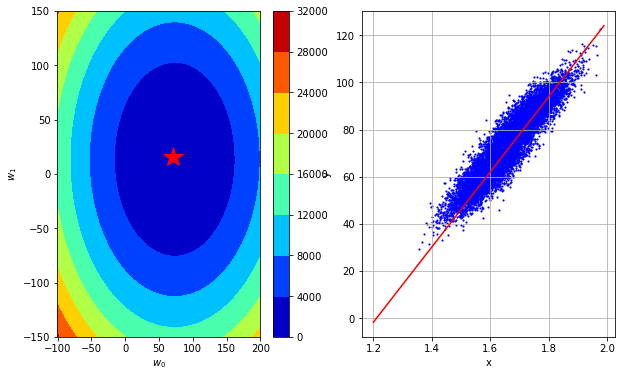

In [46]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

print(grid_w0.shape, grid_w0.shape)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot50")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [48]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    e = y - tx @ w
    grad = tx.T @ e
    print(grad)
    return (1 / len(y)) * grad

In [51]:
g1 = compute_gradient(y, tx, [1, 2])
g2 = compute_gradient(y, tx, [100, 20])
g3 = compute_gradient(y, tx, [50, 10])

print(g1, g2, g3)

[722939.22002105 114797.12434989]
[-267060.77997895  -65202.87565011]
[232939.22002105  34797.12434989]
[72.293922   11.47971243] [-26.706078    -6.52028757] [23.293922    3.47971243]


Please fill in the functions `gradient_descent` below:

In [52]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        wt = ws[n_iter]
        grad = compute_gradient(y, tx, wt)
        loss = compute_loss(y, tx, wt)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = wt - (gamma * grad) @ wt
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [70]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[10732939.22002106 -9865202.87565012]
10000
5e-05
Gradient Descent(0/49): loss=1062606.4462798769, w0=204981.42095671178, w1=206981.42095671178
[-2.04908127e+09 -2.06967941e+09]
10000
5e-05
Gradient Descent(1/49): loss=42411534629.26941, w0=8484292743.058832, w1=8484294743.058832
[-8.48429267e+13 -8.48429473e+13]
10000
5e-05
Gradient Descent(2/49): loss=7.198323958229523e+19, w0=1.4396647998564628e+19, w1=1.439664799856463e+19
[-1.4396648e+23 -1.4396648e+23]
10000
5e-05
Gradient Descent(3/49): loss=2.0726347359457472e+38, w0=4.1452694718914963e+37, w1=4.1452694718914963e+37
[-4.14526947e+41 -4.14526947e+41]
10000
5e-05
Gradient Descent(4/49): loss=1.7183258994595586e+75, w0=3.4366517989191174e+74, w1=3.4366517989191174e+74
[-3.4366518e+78 -3.4366518e+78]
10000
5e-05
Gradient Descent(5/49): loss=1.1810575587013994e+149, w0=2.3621151174028008e+148, w1=2.3621151174028008e+148
[-2.36211512e+152 -2.36211512e+152]
10000
5e-05
Gradient Descent(6/49): loss=5.5795878278628415e+296, w0=1.1159175

In [71]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [80]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************

    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        it = batch_iter(y, tx, batch_size)
        for yn, txn in it:  
            wt = ws[-1]
            grad = compute_stoch_gradient(yn, txn, wt)
            loss = compute_loss(yn, txn, wt)
            # ***************************************************
            # INSERT YOUR CODE HERE
            # TODO: update w by gradient
            # ***************************************************
            w = wt - (gamma * grad) @ wt
            # store w and loss
            ws.append(w)
            losses.append(loss)
            print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

        
    return losses, ws

In [87]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 4

# Initialization
w_initial = np.array([0.5, -0.5])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

[279.06271668  77.72590228]
4
0.125
Gradient Descent(0/49): loss=2611.9545528892927, w0=-17.11697126063653, w1=-18.11697126063653
[286.50942995 -91.90910852]
4
0.125
Gradient Descent(1/49): loss=2900.012926814805, w0=549.7183538593091, w1=548.7183538593091
[-925.42513071 -147.48775401]
4
0.125
Gradient Descent(2/49): loss=66494.85452081234, w0=103738.89134047799, w1=103737.89134047799
[ -98735.66978602 -192346.80090106]
4
0.125
Gradient Descent(3/49): loss=3773326140.0547166, w0=5284470317.8028965, w1=5284470316.8028965
[-2.73112525e+10 -3.94202644e+10]
4
0.125
Gradient Descent(4/49): loss=4.408008976461632e+19, w0=6.171212608918041e+19, w1=6.171212608918041e+19
[-2.95253431e+20 -2.24303647e+20]
4
0.125
Gradient Descent(5/49): loss=4.007871486856539e+39, w0=5.611020081599155e+39, w1=5.611020081599155e+39
[-2.50298303e+40 -2.98263765e+40]
4
0.125
Gradient Descent(6/49): loss=3.847490973419166e+79, w0=5.386487362786832e+79, w1=5.386487362786832e+79
[-2.11934136e+80 -1.93216077e+80]
4
0.1

In [88]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)